In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

split-apply-combine模式：
1. 数据集按照key的方式分成小的数据片
2. 对每一数据片进行操作
3. 将结果在组合起来
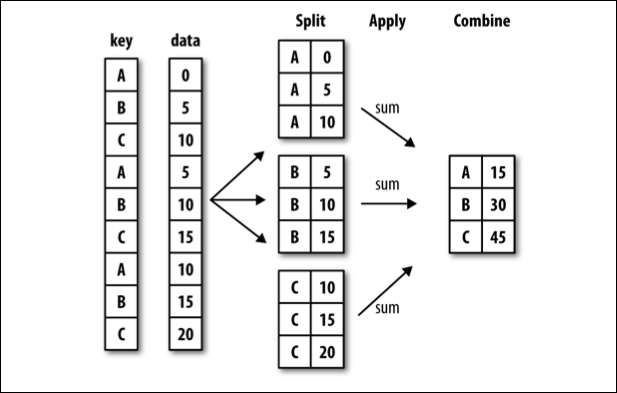

以上模式实际和MapReduce很象，MapReduce是把在单一计算机无法处理的大数据集变成分布到多个系统上小数据集，然后在每个系统进行计算，之后每个分布系统上结果在组合起来。

[The Split-Apply-Combine Strategy for Data Analysis](#https://www.jstatsoft.org/v40/i01/paper)
* 分组
* 分组数据统计
* Matplotlib以及pandas数据可视化初步

## groupby基础

In [4]:
# 如果没有下面这两行的话，会发生证书失败的问题
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

url = "https://en.wikipedia.org/wiki/List_of_European_Cup_and_UEFA_Champions_League_finals"
eu_champions = pd.read_html(url)

In [5]:
eu_champions

[                                      0                               1
 0  European Cup/Champions League trophy                             NaN
 1                               Founded                            1955
 2                                Region                   Europe (UEFA)
 3                       Number of teams  32 (group stage) 2 (finalists)
 4                     Current champions        Real Madrid (12th title)
 5               Most successful club(s)         Real Madrid (12 titles)
 6         2017–18 UEFA Champions League                             NaN,
      0                                     1
 0  NaN       Match was won during extra time
 1    *  Match was won on a penalty shoot-out
 2    &          Match was won after a replay,
                   0       1            2      3               4       5  \
 0            Season  Nation      Winners  Score      Runners-up  Nation   
 1           1955–56   Spain  Real Madrid    4–3  Stade de Reims  France   
 2

In [6]:
eu_champions[2]

,0,1,2,3,4,5,6,7
0,Season,Nation,Winners,Score,Runners-up,Nation,Venue,Attendance[11]
1,1955–56,Spain,Real Madrid,4–3,Stade de Reims,France,"Parc des Princes, Paris",38239
2,1956–57,Spain,Real Madrid,2–0,Fiorentina,Italy,"Santiago Bernabéu Stadium, Madrid",124000
3,1957–58,Spain,Real Madrid,3–2,Milan,Italy,"Heysel Stadium, Brussels",67000
4,1958–59,Spain,Real Madrid,2–0,Stade de Reims,France,"Neckarstadion, Stuttgart",72000
...,...,...,...,...,...,...,...,...
62,2016–17,Spain,Real Madrid,4–1,Juventus,Italy,"Millennium Stadium, Cardiff",65842
63,Upcoming finals,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,Season,Nation,Finalist,Match,Finalist,Nation,Venue,NaN
65,2017–18,NaN,NaN,–,NaN,NaN,"NSC Olimpiyskiy Stadium, Kiev",NaN


In [7]:
eu_champions = eu_champions[2]

In [8]:
eu_champions.columns = eu_champions.loc[0]

In [9]:
eu_champions

,Season,Nation,Winners,Score,Runners-up,Nation,Venue,Attendance[11]
0,Season,Nation,Winners,Score,Runners-up,Nation,Venue,Attendance[11]
1,1955–56,Spain,Real Madrid,4–3,Stade de Reims,France,"Parc des Princes, Paris",38239
2,1956–57,Spain,Real Madrid,2–0,Fiorentina,Italy,"Santiago Bernabéu Stadium, Madrid",124000
3,1957–58,Spain,Real Madrid,3–2,Milan,Italy,"Heysel Stadium, Brussels",67000
4,1958–59,Spain,Real Madrid,2–0,Stade de Reims,France,"Neckarstadion, Stuttgart",72000
...,...,...,...,...,...,...,...,...
62,2016–17,Spain,Real Madrid,4–1,Juventus,Italy,"Millennium Stadium, Cardiff",65842
63,Upcoming finals,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,Season,Nation,Finalist,Match,Finalist,Nation,Venue,NaN
65,2017–18,NaN,NaN,–,NaN,NaN,"NSC Olimpiyskiy Stadium, Kiev",NaN


In [10]:
# 对数据进行清理
eu_champions.drop(0, inplace=True)

In [11]:
eu_champions

,Season,Nation,Winners,Score,Runners-up,Nation,Venue,Attendance[11]
1,1955–56,Spain,Real Madrid,4–3,Stade de Reims,France,"Parc des Princes, Paris",38239
2,1956–57,Spain,Real Madrid,2–0,Fiorentina,Italy,"Santiago Bernabéu Stadium, Madrid",124000
3,1957–58,Spain,Real Madrid,3–2,Milan,Italy,"Heysel Stadium, Brussels",67000
4,1958–59,Spain,Real Madrid,2–0,Stade de Reims,France,"Neckarstadion, Stuttgart",72000
5,1959–60,Spain,Real Madrid,7–3,Eintracht Frankfurt,West Germany,"Hampden Park, Glasgow",127621
...,...,...,...,...,...,...,...,...
62,2016–17,Spain,Real Madrid,4–1,Juventus,Italy,"Millennium Stadium, Cardiff",65842
63,Upcoming finals,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,Season,Nation,Finalist,Match,Finalist,Nation,Venue,NaN
65,2017–18,NaN,NaN,–,NaN,NaN,"NSC Olimpiyskiy Stadium, Kiev",NaN


In [12]:
#eu_champions.rename(columns={"Runners-up":"Runners_up","Attendance[12]":"Attendance"},inplace=True)
eu_champions.columns=['Season', 'Nation', 'Winners', 'Score', 'Runners_up', 'Runners_up_Nation', 'Venue','Attendance']

In [16]:
eu_champions.drop([63], inplace=True)
eu_champions

,Season,Nation,Winners,Score,Runners_up,Runners_up_Nation,Venue,Attendance
1,1955–56,Spain,Real Madrid,4–3,Stade de Reims,France,"Parc des Princes, Paris",38239
2,1956–57,Spain,Real Madrid,2–0,Fiorentina,Italy,"Santiago Bernabéu Stadium, Madrid",124000
3,1957–58,Spain,Real Madrid,3–2,Milan,Italy,"Heysel Stadium, Brussels",67000
4,1958–59,Spain,Real Madrid,2–0,Stade de Reims,France,"Neckarstadion, Stuttgart",72000
5,1959–60,Spain,Real Madrid,7–3,Eintracht Frankfurt,West Germany,"Hampden Park, Glasgow",127621
...,...,...,...,...,...,...,...,...
58,2012–13,Germany,Bayern Munich,2–1,Borussia Dortmund,Germany,"Wembley Stadium, London",86298
59,2013–14,Spain,Real Madrid,4–1,Atlético Madrid,Spain,"Estádio da Luz, Lisbon",60976
60,2014–15,Spain,Barcelona,3–1,Juventus,Italy,"Olympiastadion, Berlin",70442
61,2015–16,Spain,Real Madrid,1–1*[L],Atlético Madrid,Spain,"San Siro, Milan",71942


In [17]:
# 按照某个条件进行分组
eu_championsGrp = eu_champions.groupby("Nation")

In [18]:
type(eu_championsGrp)

pandas.core.groupby.DataFrameGroupBy

In [19]:
eu_championsGrp

In [20]:
eu_championsGrp.groups     # 后面的列表代表的是第几行的数据

{'England': Int64Index([13, 22, 23, 24, 25, 26, 27, 29, 44, 50, 53, 57], dtype='int64'),
 'France': Int64Index([38], dtype='int64'),
 'Germany': Int64Index([42, 46, 58], dtype='int64'),
 'Italy': Int64Index([8, 9, 10, 14, 30, 34, 35, 39, 41, 48, 52, 55], dtype='int64'),
 'Netherlands': Int64Index([15, 16, 17, 18, 33, 40], dtype='int64'),
 'Portugal': Int64Index([6, 7, 32, 49], dtype='int64'),
 'Romania': Int64Index([31], dtype='int64'),
 'Scotland': Int64Index([12], dtype='int64'),
 'Spain': Int64Index([1, 2, 3, 4, 5, 11, 37, 43, 45, 47, 51, 54, 56, 59, 60, 61, 62], dtype='int64'),
 'West Germany': Int64Index([19, 20, 21, 28], dtype='int64'),
 'Yugoslavia': Int64Index([36], dtype='int64')}

In [21]:
len(eu_championsGrp.groups)

11

In [22]:
nation_Wins = eu_championsGrp.size()     #size是一个aggregrate 函数

In [23]:
nation_Wins     # 每个国家的个数

Nation
England         12
France           1
Germany          3
Italy           12
Netherlands      6
                ..
Romania          1
Scotland         1
Spain           17
West Germany     4
Yugoslavia       1
Length: 11, dtype: int64

In [24]:
nation_Wins.sort_values(ascending=False)    # 进行了排序

Nation
Spain           17
Italy           12
England         12
Netherlands      6
West Germany     4
                ..
Germany          3
Yugoslavia       1
Scotland         1
Romania          1
France           1
Length: 11, dtype: int64

In [25]:
winners_Grp = eu_champions.groupby(['Nation','Winners'])    # 多维分组
club_Wins = winners_Grp.size()
club_Wins

Nation        Winners          
England       Aston Villa           1
              Chelsea               1
              Liverpool             5
              Manchester United     3
              Nottingham Forest     2
                                   ..
Spain         Barcelona             5
              Real Madrid          12
West Germany  Bayern Munich         3
              Hamburg               1
Yugoslavia    Red Star Belgrade     1
Length: 23, dtype: int64

In [26]:
club_Wins.sort_values(ascending=False)

Nation       Winners         
Spain        Real Madrid         12
Italy        Milan                7
Spain        Barcelona            5
England      Liverpool            5
Netherlands  Ajax                 4
                                 ..
             Feyenoord            1
             PSV Eindhoven        1
Romania      Steaua București     1
Scotland     Celtic               1
England      Aston Villa          1
Length: 23, dtype: int64

## groupby进阶

In [27]:
goals_league2012=pd.read_csv('./data/goal_stats_euro_leagues_2012-13.csv')
goals_league2012.head()

,Month,Stat,EPL,La Liga,Serie A,Bundesliga
0,08/01/2012,MatchesPlayed,20.0,20,10.0,10.0
1,09/01/2012,MatchesPlayed,38.0,39,50.0,44.0
2,10/01/2012,MatchesPlayed,31.0,31,39.0,27.0
3,11/01/2012,MatchesPlayed,50.0,41,42.0,46.0
4,12/01/2012,MatchesPlayed,59.0,39,39.0,26.0


In [29]:
goals_league2012 = goals_league2012.set_index('Month')
goals_league2012.head()

,Stat,EPL,La Liga,Serie A,Bundesliga
Month,,,,,
08/01/2012,MatchesPlayed,20.0,20,10.0,10.0
09/01/2012,MatchesPlayed,38.0,39,50.0,44.0
10/01/2012,MatchesPlayed,31.0,31,39.0,27.0
11/01/2012,MatchesPlayed,50.0,41,42.0,46.0
12/01/2012,MatchesPlayed,59.0,39,39.0,26.0


In [30]:
goals_league2012.tail()

,Stat,EPL,La Liga,Serie A,Bundesliga
Month,,,,,
02/01/2013,GoalsScored,87.0,110,100.0,101.0
03/01/2013,GoalsScored,91.0,101,99.0,106.0
04/01/2013,GoalsScored,105.0,127,102.0,104.0
05/01/2013,GoalsScored,96.0,109,102.0,92.0
06/01/2013,GoalsScored,NaN,80,NaN,NaN


In [31]:
# ！！原来groupby里面还可以传入方法！！
goals_league2012_Grp = goals_league2012.groupby(lambda Month: Month.split('/')[2])

In [33]:
for name, group in goals_league2012_Grp:
    print('*'*30)
    print(name)
    print(group)

******************************
2012
                     Stat    EPL  La Liga  Serie A  Bundesliga
Month                                                         
08/01/2012  MatchesPlayed   20.0       20     10.0        10.0
09/01/2012  MatchesPlayed   38.0       39     50.0        44.0
10/01/2012  MatchesPlayed   31.0       31     39.0        27.0
11/01/2012  MatchesPlayed   50.0       41     42.0        46.0
12/01/2012  MatchesPlayed   59.0       39     39.0        26.0
08/01/2012    GoalsScored   57.0       60     21.0        23.0
09/01/2012    GoalsScored  111.0      112    133.0       135.0
10/01/2012    GoalsScored   95.0       88     97.0        77.0
11/01/2012    GoalsScored  121.0      116    120.0       137.0
12/01/2012    GoalsScored  183.0      109    125.0        72.0
******************************
2013
                     Stat    EPL  La Liga  Serie A  Bundesliga
Month                                                         
01/01/2013  MatchesPlayed   42.0       40     

In [37]:
# 按index进行分组
# 每个月的同一天都会进行分组
goals_league2012_Grp_month = goals_league2012.groupby(level=0)

In [38]:
for name,froup in goals_league2012_Grp_month:
    print("*"*40)
    print(name)
    print("-"*40)
    print(group)

****************************************
01/01/2013
----------------------------------------
                     Stat    EPL  La Liga  Serie A  Bundesliga
Month                                                         
01/01/2013  MatchesPlayed   42.0       40     40.0        18.0
02/01/2013  MatchesPlayed   30.0       40     40.0        36.0
03/01/2013  MatchesPlayed   35.0       38     39.0        36.0
04/01/2013  MatchesPlayed   42.0       42     41.0        36.0
05/01/2013  MatchesPlayed   33.0       40     40.0        27.0
...                   ...    ...      ...      ...         ...
02/01/2013    GoalsScored   87.0      110    100.0       101.0
03/01/2013    GoalsScored   91.0      101     99.0       106.0
04/01/2013    GoalsScored  105.0      127    102.0       104.0
05/01/2013    GoalsScored   96.0      109    102.0        92.0
06/01/2013    GoalsScored    NaN       80      NaN         NaN

[12 rows x 5 columns]
****************************************
02/01/2013
-------------

In [39]:
goals_league2012 = goals_league2012.reset_index()
goals_league2012.head(2)

,Month,Stat,EPL,La Liga,Serie A,Bundesliga
0,08/01/2012,MatchesPlayed,20.0,20,10.0,10.0
1,09/01/2012,MatchesPlayed,38.0,39,50.0,44.0


In [40]:
goals_league2012 = goals_league2012.set_index(['Month', 'Stat'])
goals_league2012.head(2)

,,EPL,La Liga,Serie A,Bundesliga
Month,Stat,,,,
08/01/2012,MatchesPlayed,20.0,20,10.0,10.0
09/01/2012,MatchesPlayed,38.0,39,50.0,44.0


In [41]:
months_stat_Grp = goals_league2012.groupby(level=['Month', 'Stat'])

In [43]:
for name, group in months_stat_Grp:
    print('*'*40)
    print(name)
    print('-'*40)
    print(group)

****************************************
('01/01/2013', 'GoalsScored')
----------------------------------------
                          EPL  La Liga  Serie A  Bundesliga
Month      Stat                                            
01/01/2013 GoalsScored  117.0      121    104.0        51.0
****************************************
('01/01/2013', 'MatchesPlayed')
----------------------------------------
                           EPL  La Liga  Serie A  Bundesliga
Month      Stat                                             
01/01/2013 MatchesPlayed  42.0       40     40.0        18.0
****************************************
('02/01/2013', 'GoalsScored')
----------------------------------------
                         EPL  La Liga  Serie A  Bundesliga
Month      Stat                                           
02/01/2013 GoalsScored  87.0      110    100.0       101.0
****************************************
('02/01/2013', 'MatchesPlayed')
----------------------------------------
        

## 使用multiple index进行统计

In [44]:
stat_Grp = goals_league2012.groupby('Stat')
stat_Grp.sum()

,EPL,La Liga,Serie A,Bundesliga
Stat,,,,
GoalsScored,1063.0,1133,1003.0,898.0
MatchesPlayed,380.0,380,380.0,306.0


In [45]:
goals_league2012.sum(level='Stat')

,EPL,La Liga,Serie A,Bundesliga
Stat,,,,
MatchesPlayed,380.0,380,380.0,306.0
GoalsScored,1063.0,1133,1003.0,898.0


In [46]:
totals = stat_Grp.sum()
totals

,EPL,La Liga,Serie A,Bundesliga
Stat,,,,
GoalsScored,1063.0,1133,1003.0,898.0
MatchesPlayed,380.0,380,380.0,306.0


In [48]:
# 平均每场进球
totals.loc['GoalsScored']/totals.loc['MatchesPlayed']

EPL           2.797368
La Liga       2.981579
Serie A       2.639474
Bundesliga    2.934641
dtype: float64

In [49]:
totals.ix['GoalsScored']/totals.ix['MatchesPlayed']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


EPL           2.797368
La Liga       2.981579
Serie A       2.639474
Bundesliga    2.934641
dtype: float64

## aggregate函数（聚集）

In [50]:
stat_Grp.aggregate(np.sum)

,EPL,La Liga,Serie A,Bundesliga
Stat,,,,
GoalsScored,1063.0,1133,1003.0,898.0
MatchesPlayed,380.0,380,380.0,306.0


In [51]:
# 同时执行多个aggregate
stat_Grp.agg([np.sum, np.mean, np.size])

EPL              La Liga              ...  Serie A        \
                  sum   mean  size     sum        mean  ...     mean  size   
Stat                                                    ...                  
GoalsScored    1063.0  106.3  11.0    1133  103.000000  ...    100.3  11.0   
MatchesPlayed   380.0   38.0  11.0     380   34.545455  ...     38.0  11.0   

              Bundesliga              
                     sum  mean  size  
Stat                                  
GoalsScored        898.0  89.8  11.0  
MatchesPlayed      306.0  30.6  11.0  

[2 rows x 12 columns]

### 下面是给这些方法我们自己的名字

In [52]:
eu_champions.dtypes

Season               object
Nation               object
Winners              object
Score                object
Runners_up           object
Runners_up_Nation    object
Venue                object
Attendance           object
dtype: object

In [53]:
# 只有数字才能求和，所以对上面的类型进行转化

In [54]:
eu_champions['Attendance'] = eu_champions['Attendance'].astype(int)

In [55]:
eu_championsGrp = eu_champions.groupby('Nation')

In [56]:
# 通过传入字典来进行自定义名称的
eu_championsGrp['Attendance'].agg({'total':np.sum, 'average':np.mean,'deviation':np.std})

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,total,average,deviation
Nation,,,
England,798411,66534.250000,17091.309877
France,64400,64400.000000,NaN
Germany,216798,72266.000000,13665.111342
Italy,789193,65766.083333,17441.027188
Netherlands,404934,67489.000000,16048.580972
...,...,...,...
Romania,70000,70000.000000,NaN
Scotland,45000,45000.000000,NaN
Spain,1224405,72023.823529,24027.625442


In [57]:
np.mean?